# Import Libraries

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
df= pd.read_csv('/home/chary/Downloads/Sleep_health_and_lifestyle_dataset.csv')

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df = df.drop(columns='Person ID')

In [5]:
df['Blood Pressure'] = df['Blood Pressure'].replace({'/':'.'}, regex=True).astype('float')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    float64
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 35.2+ KB


In [7]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,129.399973,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,7.808076,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,115.750000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,125.800000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,130.850000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,135.900000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,142.920000,86.000000,10000.000000


In [8]:
df.sample(n=7)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
289,Female,50,Nurse,6.1,6,90,8,Overweight,140.95,75,10000,Sleep Apnea
335,Female,54,Engineer,8.4,9,30,3,Normal,125.80,65,5000,None
150,Female,39,Accountant,8.0,9,80,3,Normal Weight,115.78,67,7500,None
364,Female,59,Nurse,8.0,9,75,3,Overweight,140.95,68,7000,Sleep Apnea
232,Female,44,Teacher,6.6,7,45,4,Overweight,135.90,65,6000,Insomnia
50,Male,32,Engineer,7.5,8,45,3,Normal,120.80,70,8000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125.80,75,10000,None


In [9]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

## Numerical And Categorical Split

In [10]:
cat_col = df.select_dtypes('object')
print('There is a total of ',cat_col.shape[1],'categorical columns')


There is a total of  4 categorical columns


In [11]:
num_col = df.select_dtypes('number')

print('There is a total of ',num_col.shape[1],'categorical columns')


There is a total of  8 categorical columns


## Analyze the categorical variables

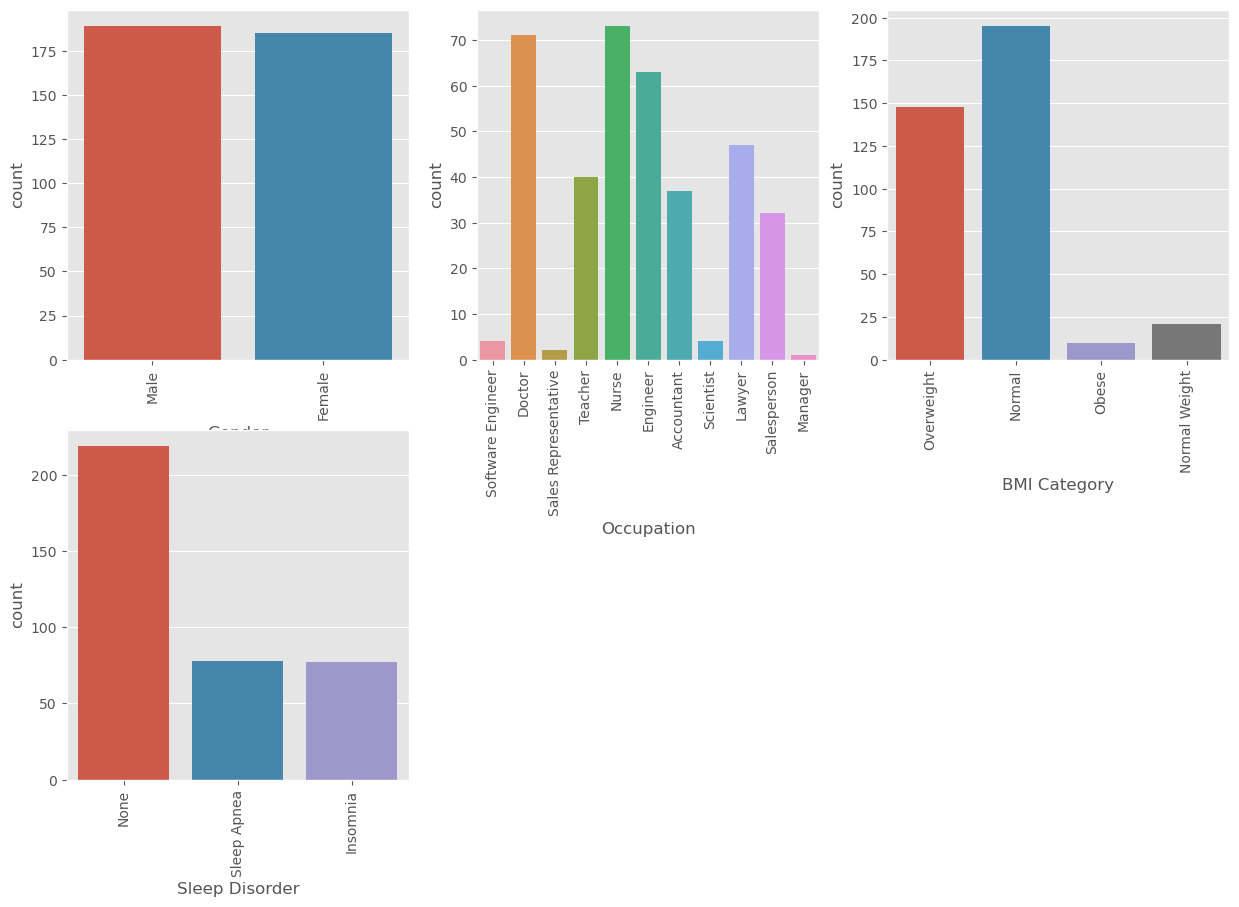

In [12]:
fig = plt.figure(figsize=(15, 10))

for i, var in enumerate(cat_col):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=var, data=cat_col)
    plt.xticks(rotation=90)

plt.show()

#  We notice that in BMI Category the data is redundant, so we are going to group it into just two labels


In [13]:
df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [14]:
df['BMI Category'] = df['BMI Category'].replace({'Obese':'Overweight','Normal Weight':'Normal'})
df['BMI Category'].value_counts()

Normal        216
Overweight    158
Name: BMI Category, dtype: int64

## Analyze the Numerical variables

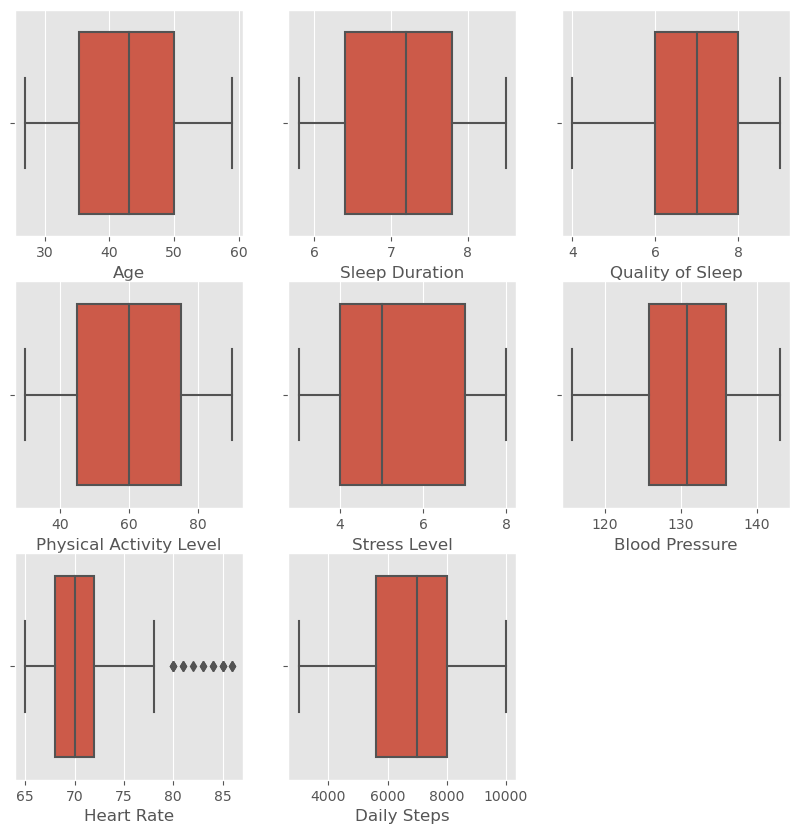

In [15]:
fig = plt.figure(figsize=(10, 10))

for i, var in enumerate(num_col):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=var, data=num_col)
    plt.xticks(rotation=0)

plt.show()



<AxesSubplot:>

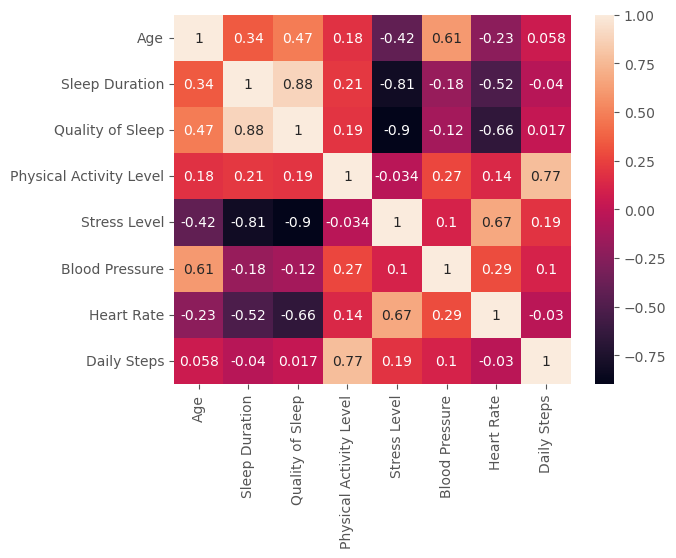

In [16]:
sns.heatmap(data=df.corr(),annot=True)


 # heart rate outliers   

<AxesSubplot:xlabel='Heart Rate', ylabel='Count'>

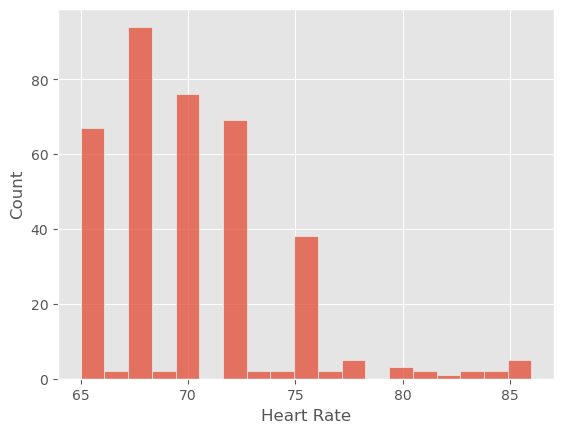

In [17]:
sns.histplot(num_col,x='Heart Rate')

# Target Analysis

In [18]:
TARGET = 'Sleep Disorder'

In [19]:
df[TARGET].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

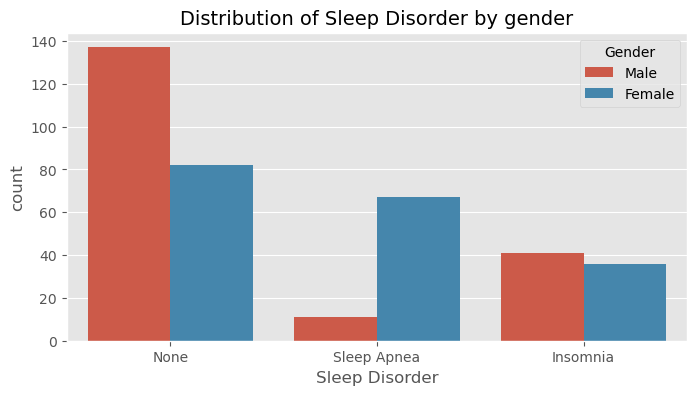

In [20]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, hue='Gender', x=TARGET)
plt.title('Distribution of Sleep Disorder by gender', fontsize=14)
plt.show()


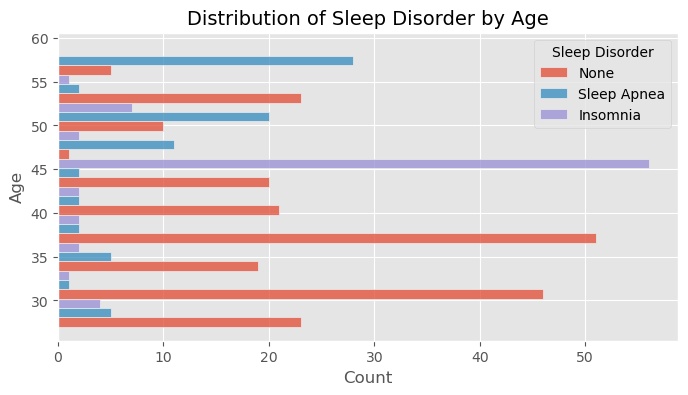

In [21]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, hue=TARGET, y='Age',
             multiple = "dodge")
plt.title('Distribution of Sleep Disorder by Age', fontsize=14)
plt.show()

In [22]:
df.columns


Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

# Preprocessing Categorical Variables

In [23]:
df.select_dtypes('object').head(6)

,Gender,Occupation,BMI Category,Sleep Disorder
0,Male,Software Engineer,Overweight,None
1,Male,Doctor,Normal,None
2,Male,Doctor,Normal,None
3,Male,Sales Representative,Overweight,Sleep Apnea
4,Male,Sales Representative,Overweight,Sleep Apnea
5,Male,Software Engineer,Overweight,Insomnia


In [24]:
label_encoder = preprocessing.LabelEncoder()

In [25]:
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])


# Train Test Split

In [26]:
X = df.drop(columns=TARGET)
y = df[TARGET]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
y_train


192    0
75     1
84     1
362    2
16     2
      ..
71     1
106    1
270    2
348    2
102    1
Name: Sleep Disorder, Length: 299, dtype: int64

#  modelling

In [29]:
scaler = StandardScaler()

In [30]:
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

In [31]:
random_forest = Pipeline(steps=[
    ('scaler', scaler),
    ('model', rf)

])



# Training and Prediction

In [32]:
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print('The model gives' ,accuracy_score(y_test, y_pred), 'accuracy on y_test')


The model gives 0.88 accuracy on y_test


In [33]:
y_train.value_counts()

1    176
2     62
0     61
Name: Sleep Disorder, dtype: int64

In [34]:
y_test_pred = pd.DataFrame(random_forest.predict(X_test), index=y_test.index, columns=[TARGET])

In [35]:
results_df = y_test_pred.join(y_test, lsuffix='_Prediction', rsuffix='_y_test', how='inner')

results_df.head(30)


,Sleep Disorder_Prediction,Sleep Disorder_y_test
329,1,1
33,1,1
15,1,1
325,1,1
57,1,1
239,0,0
76,1,1
119,1,1
332,1,1
126,1,1


# Feature Importance

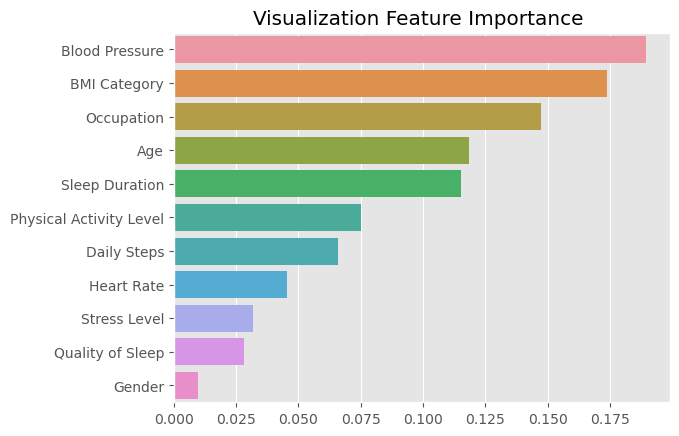

In [36]:
model = random_forest.named_steps['model']

feature_score=pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_score,y=feature_score.index)
plt.title('Visualization Feature Importance ')
plt.show()



# F1 Score

In [37]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

